# xmitgcm llcreader demo

This notebooks contains a demonstration of reading and visulizing data from the
[NAS ECCO Data Portal](https://data.nas.nasa.gov/ecco/).
It makes use of the following software libraries:

- [xmitgcm](https://xmitgcm.readthedocs.io/en/latest/llcreader.html): provides the `llcreader` module which makes all of this work
- [xarray](http://xarray.pydata.org/en/latest/): the basic data structures and computational library for the datasets 
- [dask](https://dask.org/): the parallel computing library which enables lazy representations of huge arrays
- [holoviews](http://holoviews.org/): interactive visualizations

We start by importing the necessary libraries

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
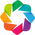

In [1]:
import xmitgcm.llcreader as llcreader
%matplotlib inline
import holoviews as hv
from holoviews.operation.datashader import regrid
hv.extension('bokeh')

### Initialize Model Object

[xmitgcm.llcreader]() contains pre-configured references to known LLC model configurations.
We create one of these references as follows:

In [2]:
model = llcreader.ECCOPortalLLC2160Model()
model
model.varnames

['Eta',
 'KPPhbl',
 'oceFWflx',
 'oceQnet',
 'oceQsw',
 'oceSflux',
 'oceTAUX',
 'oceTAUY',
 'PhiBot',
 'Salt',
 'SIarea',
 'SIheff',
 'SIhsalt',
 'SIhsnow',
 'SIuice',
 'SIvice',
 'Theta',
 'U',
 'V',
 'W']

### Create Xarray Dataset

The `model` object can generate xarray datasets for us.
In this example, we generate a dataset which contains the SST for the full model integration.
The `type='latlon'` keyword tells xmitgcm to just show us the "Lat Lon" (LL) part of the LLC grid.

In [5]:
ds_sst = model.get_dataset(varnames=['Theta'], k_levels=[0], type='latlon')
ds_sst

<xarray.Dataset>
Dimensions:  (face: 13, i: 8640, i_g: 8640, j: 6480, j_g: 6480, k: 1, k_l: 1, k_p1: 1, k_u: 1, time: 18679)
Coordinates:
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 6473 6474 6475 6476 6477 6478 6479
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 8633 8634 8635 8636 8637 8638 8639
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 8633 8634 8635 8636 8637 8638 8639
  * k_u      (k_u) int64 0
  * k_p1     (k_p1) int64 0
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 6473 6474 6475 6476 6477 6478 6479
  * k_l      (k_l) int64 0
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * k        (k) int64 0
  * time     (time) datetime64[ns] 2011-03-06 ... 2013-04-22T06:00:00
Data variables:
    Theta    (time, k, j, i) >f4 dask.array<shape=(18679, 1, 6480, 8640), chunksize=(1, 1, 6480, 2160)>

This dataset is "lazy"; it doesn't actually load any data from the server until required for computation or plotting.
That's a good thing, because it represents over 4 TB of data.

In [ ]:
ds_sst.nbytes / 1e12

In [6]:
ds_oceQnet = model.get_dataset(varnames=['oceQnet'], k_levels=[0], type='latlon')
ds_oceQnet

<xarray.Dataset>
Dimensions:  (face: 13, i: 8640, i_g: 8640, j: 6480, j_g: 6480, k: 1, k_l: 1, k_p1: 1, k_u: 1, time: 18679)
Coordinates:
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 6473 6474 6475 6476 6477 6478 6479
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 8633 8634 8635 8636 8637 8638 8639
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 8633 8634 8635 8636 8637 8638 8639
  * k_u      (k_u) int64 0
  * k_p1     (k_p1) int64 0
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 6473 6474 6475 6476 6477 6478 6479
  * k_l      (k_l) int64 0
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * k        (k) int64 0
  * time     (time) datetime64[ns] 2011-03-06 ... 2013-04-22T06:00:00
Data variables:
    oceQnet  (time, j, i) >f4 dask.array<shape=(18679, 6480, 8640), chunksize=(1, 6480, 2160)>

### Dynamic Interactive Visualization

Here we create an interactive map of SST which automatically resamples the fields at a resolution appropriate for our screen.

In [7]:
dataset = hv.Dataset(ds_sst.Theta.isel(k=0).astype('f4'))
hv_im = (dataset.to(hv.Image, ['i', 'j'], dynamic=True)
                .options(cmap='Magma', width=950, height=600, colorbar=True))
hv_im_redim = hv_im.redim.range(Theta=(0,30))
%output holomap='scrubber' fps=3
regrid(hv_im_redim, precompute=True)

:DynamicMap   [time]
   :Image   [i,j]   (Theta)

In [9]:
dataset = hv.Dataset(ds_oceQnet.oceQnet.astype('f4'))
hv_im = (dataset.to(hv.Image, ['i', 'j'], dynamic=True)
                .options(cmap='Spectral_r', width=950, height=600, colorbar=True))

hv_im_redim = hv_im.redim.range(oceQnet=(-600,600))
%output holomap='scrubber' fps=3
regrid(hv_im_redim, precompute=True)

:DynamicMap   [time]
   :Image   [i,j]   (oceQnet)